# Domain walls

In [1]:
# Module to add Ginzburg-Landau plot

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def glsol(kappa,A,B):
  a,ba,fa=A
  b,bb,fb=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array([Ya[0]-fa, Yb[0]-fb, Ya[3]-ba,Yb[3]-bb])
  rng=[a, b]
  x = np.linspace(*rng, nodes)
  Y = np.zeros((4, x.size))
  for k in range(x.size): # initialize f to 1
    Y[0,k]=1
  return solve_bvp(dY, bc, x, Y)

def glplot(kappa,A,B,tex):
  sol=glsol(kappa,A,B)
  print(sol.success)
  x_plot = np.linspace(A[0],B[0], 100)
  y_plot = sol.sol(x_plot)[0] # f
  plt.plot(x_plot, y_plot,label=f"$f: {tex}$")
  y_plot = sol.sol(x_plot)[3] # b=da
  plt.plot(x_plot, y_plot,label=f"$b: {tex}$")
  return 0


## Domain wall energy
### $\delta$ version [Arovas]


In [6]:
def dwenergy(kappa,A,B):
  sol=glsol(kappa,A,B)
  L=B[0]-A[0]
  plots=sol.sol(np.linspace(A[0],B[0], 100))
  f = plots[0] # f
  b =plots[3] # b=da
  return sum(-f**4+2*(b-A[1])**2)*L/100
  

In [36]:
K=np.linspace(0.5,8,30)
D=[dwenergy(k,A,B) for k in K]


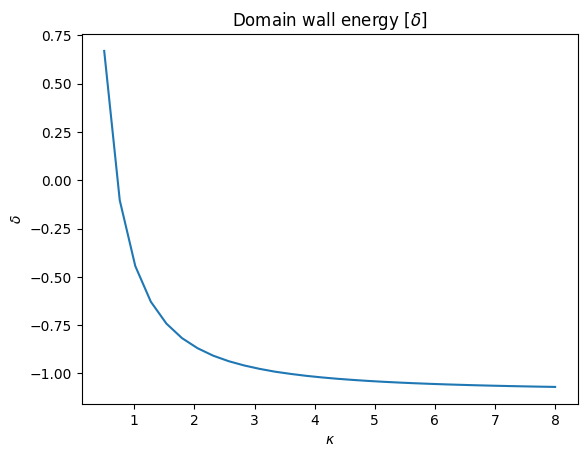

In [37]:
plt.plot(K,D)
plt.xlabel("$\kappa$")
plt.ylabel("$\delta$")
plt.title(f"Domain wall energy [$\delta$]")
plt.show()

### Free energy version [dg]

In [38]:
def dg(kappa,h,b,f,df): # gibbs free energy difference between superconducting and normal metals
  return -f**2+f**4/2+(df/kappa)**2+(b-h)**2

def dwg(kappa,A,B):
  sol=glsol(kappa,A,B)
  L=B[0]-A[0]
  plots=sol.sol(np.linspace(A[0],B[0], 100))
  f = plots[0] # f
  df=plots[1]
  b =plots[3] # b=da
  return sum(dg(kappa,A[1],b,f,df))*L/100


In [39]:
K=np.linspace(0.5,8,30)
D=[dwg(k,A,B) for k in K]


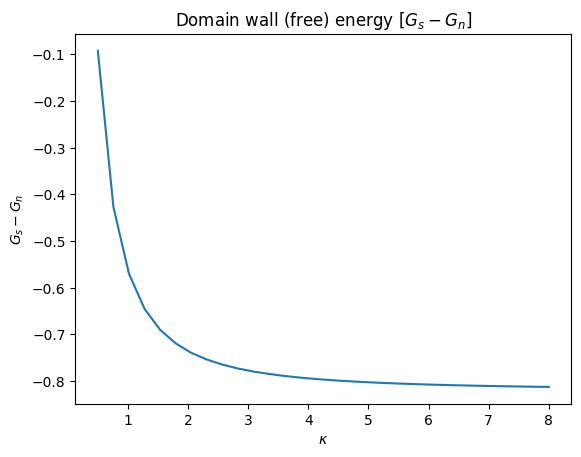

In [41]:
plt.plot(K,D)
plt.xlabel("$\kappa$")
plt.ylabel("$G_s-G_n$")
plt.title(f"Domain wall (free) energy [$G_s-G_n$]")
plt.show()

Not sure why this doesn't give the same answer, although the shape is similar, but with scale and offset shifts. This needs investigation . . . probably by following through the theory, when I have time.